# Just noise?

### Reanalyzing the data from Douven and Schupbach (2015) in light of Costello and Watts' (2016, 2018) proposal

In [1]:
using DataFrames, MixedModels

Import the data from Douven and Schupbach (2015):

In [2]:
data = readtable("data.csv");

Add difference in explanatory goodness and participant IDs to the data frame:

In [3]:
data[:diff] = Array{Float64}(data[:Judge_A] .- data[:Judge_B])
data[:id] = repeat(1:26, inner=10)
head(data)

,Judge_A,Judge_B,Post_AO,Post_BO,Post_AS,Post_BS,diff,id
1,-0.35,0.5,0.285714286,0.714285714,0.35,0.65,-0.85,1
2,-0.6,0.6,0.130434783,0.869565217,0.2,0.8,-1.2,1
3,-0.7,0.7,0.049586777,0.950413223,0.14,0.86,-1.4,1
4,-0.8,0.75,0.016329705,0.983670295,0.12,0.88,-1.55,1
5,-0.85,0.77,0.004720692,0.995279308,0.08,0.92,-1.62,1
6,-0.85,0.77,0.009397024,0.990602976,0.1,0.9,-1.62,1


Below the model that came out on top in Douven and Schupbach's analysis, MMOD:

In [4]:
form = @formula(Post_AS ~ Post_AO + diff + (Post_AO + diff | id));

In [5]:
mm = lmm(form, data);

In [6]:
fit!(mm)

Linear mixed model fit by maximum likelihood
 Formula: Post_AS ~ Post_AO + diff + ((Post_AO + diff) | id)
   logLik   -2 logLik     AIC        BIC    
  327.52545 -655.05090 -635.05090 -599.44408

Variance components:
              Column     Variance    Std.Dev.    Corr.
 id       (Intercept)  0.0180539309 0.13436492
          Post_AO      0.0832235061 0.28848485 -0.99
          diff         0.0081435447 0.09024159  0.73 -0.76
 Residual              0.0031696336 0.05629950
 Number of obs: 260; levels of grouping factors: 26

  Fixed-effects parameters:
             Estimate Std.Error z value P(>|z|)
(Intercept)  0.338718  0.031802 10.6509  <1e-25
Post_AO      0.378594 0.0667056  5.6756   <1e-7
diff         0.128708    0.0231 5.57178   <1e-7


Below the 'Bayesian' model, MMO:

In [7]:
form₀ = @formula(Post_AS ~ Post_AO + (Post_AO | id));

In [8]:
mm₀ = lmm(form₀, data);

In [9]:
fit!(mm₀)

Linear mixed model fit by maximum likelihood
 Formula: Post_AS ~ Post_AO + (Post_AO | id)
   logLik   -2 logLik     AIC        BIC    
  282.34147 -564.68295 -552.68295 -531.31886

Variance components:
              Column     Variance    Std.Dev.    Corr.
 id       (Intercept)  0.012080293 0.109910384
          Post_AO      0.053188793 0.230626957 -0.95
 Residual              0.004822816 0.069446496
 Number of obs: 260; levels of grouping factors: 26

  Fixed-effects parameters:
             Estimate Std.Error z value P(>|z|)
(Intercept)  0.208694 0.0245951 8.48516  <1e-16
Post_AO       0.64625 0.0487972 13.2436  <1e-39


And finally MMOAB:

In [10]:
form₁ = @formula(Post_AS ~ Post_AO + Judge_A + Judge_B + (Post_AO + Judge_A + Judge_B | id));

In [11]:
mm₁ = lmm(form₁, data);

In [12]:
fit!(mm₁)

Linear mixed model fit by maximum likelihood
 Formula: Post_AS ~ Post_AO + Judge_A + Judge_B + ((Post_AO + Judge_A + Judge_B) | id)
   logLik   -2 logLik     AIC        BIC    
   329.1307  -658.2614  -628.2614  -574.8512

Variance components:
              Column     Variance    Std.Dev.    Corr.
 id       (Intercept)  0.0186601684 0.13660223
          Post_AO      0.0860752401 0.29338582 -0.99
          Judge_A      0.0105965160 0.10293938  0.71 -0.72
          Judge_B      0.0066671959 0.08165290 -0.82  0.84 -0.98
 Residual              0.0031248927 0.05590074
 Number of obs: 260; levels of grouping factors: 26

  Fixed-effects parameters:
              Estimate Std.Error  z value P(>|z|)
(Intercept)   0.345564 0.0326956  10.5691  <1e-25
Post_AO       0.373062 0.0677542  5.50612   <1e-7
Judge_A       0.147686 0.0278797  5.29726   <1e-6
Judge_B      -0.111288 0.0236593 -4.70378   <1e-5


Likelihood ratio tests

In [13]:
MixedModels.lrt(mm₀, mm)

,Df,Deviance,Chisq,pval
1,6,-564.683,NaN,NaN
2,10,-655.051,90.3679,1.09987e-18


In [14]:
MixedModels.lrt(mm₀, mm₁)

,Df,Deviance,Chisq,pval
1,6,-564.683,NaN,NaN
2,15,-658.261,93.5785,3.1085e-16


We can answer the question of whether Costello and Watts' proposal can account for Douven and Schupbach's findings by trying to predict the subjective updated probabilities reported by Douven and Schupbach not by the objective conditional probabilities but instead by the 'noisy' version of that predictor, transformed according to the formula given by Costello and Watts. The following first defines a function that takes Costello and Watts' error parameter *d* as input and outputs the transformed predictor for the given value of *d*. The function is based on Eq. 17 in Costello and Watts (2018), according to which
$$
\Pr\nolimits_*(A\,|\,B) \:\: = \:\: \frac{(1-2d)^2\Pr(A\wedge B) + d(1-2d)\bigl(\Pr(A) + \Pr(B)\bigr) + d^2}{(1-2d)\Pr(B) + d},
$$
where $\Pr_*(A\,|\,B)$ is the noisy estimate of the probability of $A$ conditional on $B$, and with the noise parameter $d\in[0,.5)$. Notice that if $d=0$, indicating that there is no noise, then 
$$
\Pr\nolimits_*(A\,|\,B)  \:\: = \:\: \frac{\Pr(A\wedge B)}{\Pr(B)} \:\: = \:\: \Pr(A\,|\,B).
$$
Then we fit for *d* going from 0 to .5, in small increments, mixed models like the ones above except that the new models have the noisy objective probabilities, rather than the unnoisy ones, as predictor. We look whether for at least one value of *d* the correspondig Bayesian model does best, or whether explanatory considerations do still make a significant contribution to model fit even when noise is taken into account.

First calculate the probabilities needed to perform the Costello and Watts transformation:

In [15]:
data1 = copy(data)

ProbEvA = Array{Float64}(10, 26)
ProbEvB = Array{Float64}(10, 26)

for i in 1:26
    
    Pr = vcat(0.5, data1[:Post_AO][(i * 10 - 9):(i * 10)])

    for j in 1:10
        Pr[j + 1] < Pr[j] ? (ProbEvA[j, i], ProbEvB[j, i]) = (0.25, 0.625) : (ProbEvA[j, i], ProbEvB[j, i]) = (0.75, 0.375)
    end

end

data1[:ProbEv] = mean(hcat(cumprod(ProbEvA, 1)[:], cumprod(ProbEvB, 1)[:]), 2)[:]
data1[:HA_Ev] = data1[:Post_AO] .* data1[:ProbEv];

In [16]:
head(data1)

,Judge_A,Judge_B,Post_AO,Post_BO,Post_AS,Post_BS,diff,id,ProbEv,HA_Ev
1,-0.35,0.5,0.285714,0.714286,0.35,0.65,-0.85,1,0.4375,0.125
2,-0.6,0.6,0.130435,0.869565,0.2,0.8,-1.2,1,0.226563,0.0295516
3,-0.7,0.7,0.0495868,0.950413,0.14,0.86,-1.4,1,0.129883,0.00644047
4,-0.8,0.75,0.0163297,0.98367,0.12,0.88,-1.55,1,0.0782471,0.00127775
5,-0.85,0.77,0.00472069,0.995279,0.08,0.92,-1.62,1,0.048172,0.000227405
6,-0.85,0.77,0.00939702,0.990603,0.1,0.9,-1.62,1,0.0182476,0.000171473


The following function calculates AIC values for the Bayesian model (with 'noisified' objective probabilities as predictor), the model with noisified objective probabilities and judgments of explanatory goodness as predictors, and the model with noisified objective probabilities and *difference* in explanatory goodness as predictors, for a range of possible noisifications:

In [17]:
function aic_vals(d)

    data1[:Prob_noise] = ((1-2d)^2 .* data1[:HA_Ev] .+ 
        (d-2d^2) .* (0.5 .+ data1[:ProbEv]) .+ d^2) ./ ((1-2d) .* data1[:ProbEv] .+ d)

    BAY = MixedModels.aic(fit!(lmm(@formula(Post_AS ~ Prob_noise + (1 + Prob_noise | id)), data1)))
            
    EXPL = MixedModels.aic(fit!(lmm(@formula(Post_AS ~ Prob_noise + Judge_A + Judge_B + 
                            (1 + Prob_noise + Judge_A + Judge_B | id)), data1)))

    DIFF = MixedModels.aic(fit!(lmm(@formula(Post_AS ~ Prob_noise + diff + (1 + Prob_noise + diff | id)), data1)))
    
    return vcat(BAY, EXPL, DIFF)

end

aic_vals (generic function with 1 method)

In [18]:
aicVals = Array{Float64, 2}(100, 3)

for i in 1:100
    aicVals[i,:] = aic_vals(collect(0.0:0.005:0.495)[i])
end

In [19]:
AV = DataFrame( AIC = aicVals[:],
                d_val = repeat(collect(0.000:0.005:0.495), outer=3),
                Predictors = repeat(["<i>f</i>(O, <i>d</i>)", "<i>f</i>(O, <i>d</i>)AB", "<i>f</i>(O, <i>d</i>)D"], inner=100));

Visualize the outcomes:

In [20]:
using Gadfly, Fontconfig, Cairo

In [21]:
using Colors

function gen_brew_colors(n) # to create your own colors, here based on one of the brewer series
    cs = distinguishable_colors(n, 
        [colorant"#66c2a5", colorant"#fc8d62", colorant"#8da0cb", colorant"#e78ac3", 
            colorant"#a6d854", colorant"#ffd92f", colorant"#e5c494", colorant"#b3b3b3"],
        lchoices=Float64[58, 45, 72.5, 90],
        transform=c -> deuteranopic(c, 0.1),
        cchoices=Float64[20,40],
        hchoices=[75,51,35,120,180,210,270,310]
    )
    convert(Vector{Color}, cs)
end

set_default_plot_size(8inch, 8inch/golden)

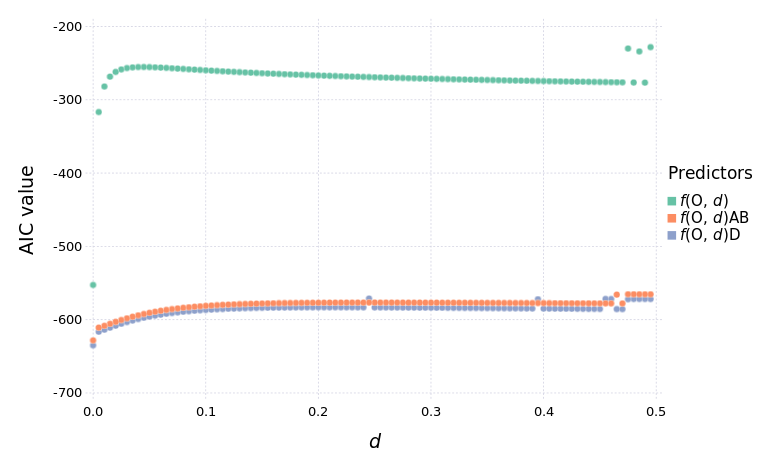

In [22]:
CW = plot(AV, x=:d_val, y=:AIC, color=:Predictors, Geom.point,
    Guide.ylabel("AIC value"),
    Guide.xlabel("<i>d</i>"),
    Scale.color_discrete_manual(gen_brew_colors(3)...),
    Theme(point_size=2.5pt, minor_label_font_size=10pt,
        major_label_font_size=14pt,
        minor_label_color=colorant"black",
        major_label_color=colorant"black",
        key_title_font_size=13pt,
        key_label_font_size=11pt,
        key_label_color=colorant"black",
        key_title_color=colorant"black",
        highlight_width=0.25pt))

In [23]:
draw(PDF("CW_new.pdf", 8inch, 8inch/golden, dpi=600), CW);

The mixed models in the analysis from Douven and Schupbach were fitted using the `lmer` package for `R`. The paper restates the outcomes from that analysis.

In [24]:
using RCall

R"""
library(afex)
library(sjstats)
library(BayesFactor)
"""

RCall.RObject{RCall.StrSxp}
 [1] "BayesFactor"  "coda"         "sjstats"      "afex"         "lsmeans"     
 [6] "estimability" "lme4"         "Matrix"       "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        


In [25]:
@rput data;

In [26]:
R"lmBF(Post_AS ~ Post_AO + Judge_A + Judge_B, whichRandom = c('id'), data=data)"

RCall.RObject{RCall.S4Sxp}
Bayes factor analysis
--------------
[1] Post_AO + Judge_A + Judge_B : 3.003277e+121 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



In [27]:
R"lmBF(Post_AS ~ Post_AO, whichRandom = c('id'), data=data)"

RCall.RObject{RCall.S4Sxp}
Bayes factor analysis
--------------
[1] Post_AO : 5.61909e+97 ±0.01%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



In [28]:
R"lmBF(Post_AS ~ Post_AO + diff, whichRandom = c('id'), data=data)"

RCall.RObject{RCall.S4Sxp}
Bayes factor analysis
--------------
[1] Post_AO + diff : 6.24216e+122 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



In [29]:
R"lmBF(Post_AS ~ diff, whichRandom = c('id'), data=data)"

RCall.RObject{RCall.S4Sxp}
Bayes factor analysis
--------------
[1] diff : 9.929346e+113 ±0.01%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS



In [30]:
R"r2(lmer(Post_AS ~ Post_AO + (1 + Post_AO | id), data=data, control=lmerControl(optCtrl=list(maxfun=1e6))))"

RCall.RObject{RCall.VecSxp}
    R-squared: 0.9427
Omega-squared: 0.9426


In [31]:
R"r2(lmer(Post_AS ~ Post_AO + Judge_A + Judge_B + (1 + Post_AO + Judge_A + Judge_B | id), data=data, control=lmerControl(optCtrl=list(maxfun=1e6))))"

RCall.RObject{RCall.VecSxp}
    R-squared: 0.9654
Omega-squared: 0.9654


In [32]:
R"r2(lmer(Post_AS ~ Post_AO + diff + (1 + Post_AO + diff | id), data=data, control=lmerControl(optCtrl=list(maxfun=1e6))))"

RCall.RObject{RCall.VecSxp}
    R-squared: 0.9646
Omega-squared: 0.9645
